## The code below parses the focus-filtered data into two groups (multiple object and single object)
### The cutoff was determined by checking the raw data. If the mean object value (count) was above 1.35 there were consistently >1 cells 

In [1]:
library(dplyr)
library(vioplot)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘tidyr’


The following object is masked _by_ ‘.GlobalEnv’:

    extract_numeric




In [2]:
# In this approach, after we categorize pools as either "single object" or "multiple objects", we make sure to keep only the first occurrence 
# of each metadata_pool_id during the extraction of metadata. This ensures there are no duplicates in our output files.
#new cutoff is mean_object 1.35 because after checking the raw video files around this cutoff we saw 1 cell in the ones <1.35 and more than one 
#cell in > 1.35

#To Do: add instructions for which file in this repo outputs this file fseq when the script has been added

# Load the main measurements file
measure_2d <- read.csv("fseq_measurements.v.1.csv")

# Define the metadata columns you're interested in
metadata_cols <- c("metadata_experiment", "metadata_species", "metadata_pool_id", "mean_object", "std_object", "median_object")

# Calculate average mean_object for each metadata_pool_id
avg_mean_object <- measure_2d %>%
  group_by(metadata_pool_id) %>%
  summarize(avg_mean = mean(mean_object, na.rm = TRUE))

# Determine single and multiple object pools
single_object_pools <- avg_mean_object %>%
  filter(avg_mean < 1.35) %>%
  pull(metadata_pool_id)

multiple_objects_pools <- avg_mean_object %>%
  filter(avg_mean >= 1.35) %>%
  pull(metadata_pool_id)

# Extracting metadata for single object pools
single_object_metadata <- measure_2d %>%
  filter(metadata_pool_id %in% single_object_pools) %>%
  select(all_of(metadata_cols)) %>%
  group_by(metadata_pool_id) %>%
  slice(1) %>%  # This takes only the first row for each metadata_pool_id
  ungroup()

write.csv(single_object_metadata, "single_object_metadata_newcutoff.csv", row.names = FALSE)

# Extracting metadata for multiple objects pools
multiple_objects_metadata <- measure_2d %>%
  filter(metadata_pool_id %in% multiple_objects_pools) %>%
  select(all_of(metadata_cols)) %>%
  group_by(metadata_pool_id) %>%
  slice(1) %>%  # This takes only the first row for each metadata_pool_id
  ungroup()

write.csv(multiple_objects_metadata, "multiple_objects_metadata_newcutoff.csv", row.names = FALSE)

In [3]:
head(single_object_metadata)

metadata_experiment,metadata_species,metadata_pool_id,mean_object,std_object,median_object
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
230519_motility_pools_exp3,cr,10x_dic_redfilter_001_0,1.013592,0.13162302,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_001_1,1.000000,0.00000000,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_002_1,1.000000,0.00000000,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_002_2,1.005102,0.07133717,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_0,1.481413,0.70949155,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_7,1.209651,0.41146897,1


In [4]:
head(multiple_objects_metadata)

metadata_experiment,metadata_species,metadata_pool_id,mean_object,std_object,median_object
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
230519_motility_pools_exp3,cr,10x_dic_redfilter_002_0,1.498485,0.5001872,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_1,1.675676,0.7497422,2
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_2,1.431515,0.5936360,1
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_3,1.655685,0.7208462,2
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_4,2.127737,1.0412009,2
230519_motility_pools_exp3,cr,10x_dic_redfilter_003_5,1.836832,0.9440399,2


### Extracted the velocity and angular velocity measurements from each unique pool (based on metadata ID)

In [5]:
#extract velocity and angular velocity from large measurement csv uses the files created with the new cutoff which was 
# mean_object < or > 1.35 

# Read in the CSV files
single_object_data <- read.csv("single_object_metadata_newcutoff.csv")
multiple_objects_data <- read.csv("multiple_objects_metadata_newcutoff.csv")

#To Do: add instructions for which file in this repo outputs this file fseq_well_avg_2 when the script has been added
well_avg_data <- read.csv("fseq_velocities_well_avg_2.csv")

# For single objects:

# Inner join to match rows from well_avg_data to rows in single_object_data based on metadata_pool_id
single_object_measurements <- inner_join(well_avg_data, single_object_data, by="metadata_pool_id")

# Save to a new CSV
write.csv(single_object_measurements, "single_object_measurements_newcutoff.csv", row.names = FALSE)

# For multiple objects:

# Inner join to match rows from well_avg_data to rows in multiple_objects_data based on metadata_pool_id
multiple_objects_measurements <- inner_join(well_avg_data, multiple_objects_data, by="metadata_pool_id")

# Save to a new CSV
write.csv(multiple_objects_measurements, "multiple_objects_measurements_newcutoff.csv", row.names = FALSE)

print("Specific measurement files created successfully!")


[1] "Specific measurement files created successfully!"


In [6]:
head(single_object_measurements)

,metadata_experiment.x,metadata_species.x,metadata_pool_id,velocity,angular_velocity,metadata_experiment.y,metadata_species.y,mean_object,std_object,median_object
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
1,230509_motility_pools_exp1,cr,pools_slide1_001_1,90.645176,763.2514,230509_motility_pools_exp1,cr,1,0,1
2,230509_motility_pools_exp1,cr,pools_slide1_001_2,66.359386,770.2651,230509_motility_pools_exp1,cr,1,0,1
3,230509_motility_pools_exp1,cr,pools_slide1_001_3,21.457706,1626.6187,230509_motility_pools_exp1,cr,1,0,1
4,230509_motility_pools_exp1,cr,pools_slide1_002_0,55.921414,1119.1634,230509_motility_pools_exp1,cr,1,0,1
5,230509_motility_pools_exp1,cr,pools_slide1_002_1,76.874523,632.2017,230509_motility_pools_exp1,cr,1,0,1
6,230509_motility_pools_exp1,cr,pools_slide1_002_2,7.595974,2023.4375,230509_motility_pools_exp1,cr,1,0,1


In [7]:
head(multiple_objects_measurements)

,metadata_experiment.x,metadata_species.x,metadata_pool_id,velocity,angular_velocity,metadata_experiment.y,metadata_species.y,mean_object,std_object,median_object
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,230509_motility_pools_exp1,cr,pools_slide1_001_0,66.73518,1340.2186,230509_motility_pools_exp1,cr,1.424888,0.4944646,1
2,230509_motility_pools_exp1,cr,pools_slide1_003_2,65.02677,697.0874,230509_motility_pools_exp1,cr,1.391908,0.4883238,1
3,230509_motility_pools_exp1,cr,pools_slide1_005_1,52.49601,854.9399,230509_motility_pools_exp1,cr,1.428991,0.4950773,1
4,230509_motility_pools_exp1,cr,pools_slide1_007_2,30.69859,1178.9594,230509_motility_pools_exp1,cr,1.462199,0.4987119,1
5,230509_motility_pools_exp1,cr,pools_slide1_007_3,25.87883,696.5501,230509_motility_pools_exp1,cr,1.420572,0.4938012,1
6,230509_motility_pools_exp1,cr,pools_slide1_009_0,57.40968,434.6109,230509_motility_pools_exp1,cr,1.434921,0.4958778,1


### Then organized the data separating a file for angular_velocity - multiple objects

In [8]:
#extracting angular velocity measurements from single object data and organizing for regression scripts

# Read in the measurement file
data <- read.csv("multiple_objects_measurements_newcutoff.csv") # Replace with your file name

# Extract experiment ID from metadata_experiment.x
data$experiment_id <- gsub(".*_(exp\\d+)$", "\\1", data$metadata_experiment.x)

# Combine species and experiment ID to create new column for species_experiment
data$species_experiment <- paste0(data$metadata_species.x, "_", data$experiment_id)

# Organize data in wide format
spread_data <- data %>%
  select(metadata_pool_id, mean_object, species_experiment, angular_velocity) %>%
  spread(key = species_experiment, value = angular_velocity)

# Save to a new CSV
write.csv(spread_data, "organized_angular_velocity_data_multiple.csv", row.names = FALSE)

print("Data organized and saved!")

[1] "Data organized and saved!"


### and one for velocity - multiple objects

In [9]:
# Read in the measurement file
data <- read.csv("multiple_objects_measurements_newcutoff.csv") # Replace with your file name

# Extract experiment ID from metadata_experiment.x
data$experiment_id <- gsub(".*_(exp\\d+)$", "\\1", data$metadata_experiment.x)

# Combine species and experiment ID to create new column for species_experiment
data$species_experiment <- paste0(data$metadata_species.x, "_", data$experiment_id)

# Organize data in wide format
spread_data <- data %>%
  select(metadata_pool_id, mean_object, species_experiment, velocity) %>%
  spread(key = species_experiment, value = velocity)

# Save to a new CSV
write.csv(spread_data, "organized_velocity_data_multiple.csv", row.names = FALSE)

print("Data organized and saved!")

[1] "Data organized and saved!"


### one for angular velocity - single objects

In [10]:
# Read in the measurement file
data <- read.csv("single_object_measurements_newcutoff.csv") # Replace with your file name

# Extract experiment ID from metadata_experiment.x
data$experiment_id <- gsub(".*_(exp\\d+)$", "\\1", data$metadata_experiment.x)

# Combine species and experiment ID to create new column for species_experiment
data$species_experiment <- paste0(data$metadata_species.x, "_", data$experiment_id)

# Organize data in wide format
spread_data <- data %>%
  select(metadata_pool_id, mean_object, species_experiment, angular_velocity) %>%
  spread(key = species_experiment, value = angular_velocity)

# Save to a new CSV
write.csv(spread_data, "organized_angular_velocity_data_single.csv", row.names = FALSE)

print("Data organized and saved!")

[1] "Data organized and saved!"


### one for velocity - single objects

In [11]:
# Read in the measurement file
data <- read.csv("single_object_measurements_newcutoff.csv") # Replace with your file name

# Extract experiment ID from metadata_experiment.x
data$experiment_id <- gsub(".*_(exp\\d+)$", "\\1", data$metadata_experiment.x)

# Combine species and experiment ID to create new column for species_experiment
data$species_experiment <- paste0(data$metadata_species.x, "_", data$experiment_id)

# Organize data in wide format
spread_data <- data %>%
  select(metadata_pool_id, mean_object, species_experiment, velocity) %>%
  spread(key = species_experiment, value = velocity)

# Save to a new CSV
write.csv(spread_data, "organized_velocity_data_single.csv", row.names = FALSE)

print("Data organized and saved!")

[1] "Data organized and saved!"


### First compare single-cell measurements - velocity and angular velocity


## Running regressions on velocity measurement


Call:
lm(formula = measure ~ experiment + species, data = dat_long)

Residuals:
    Min      1Q  Median      3Q     Max 
-75.263 -14.726   1.935  16.044  71.701 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      66.486      3.821  17.399  < 2e-16 ***
experimentexp2   19.143      4.649   4.117 5.24e-05 ***
experimentexp3   -1.280      5.159  -0.248    0.804    
experimentexp4   19.653      4.688   4.192 3.87e-05 ***
speciescs       -32.970      3.297 -10.000  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.83 on 245 degrees of freedom
Multiple R-squared:  0.365,	Adjusted R-squared:  0.3546 
F-statistic: 35.21 on 4 and 245 DF,  p-value: < 2.2e-16



Call:
lm(formula = measure ~ experiment, data = dat_long)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.368 -24.820  -2.698  23.452  86.153 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      53.171      4.242  12.536  < 2e-16 ***
experimentexp2   18.142      5.505   3.296 0.001127 ** 
experimentexp3   -5.460      6.090  -0.897 0.370819    
experimentexp4   18.515      5.550   3.336 0.000982 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.59 on 246 degrees of freedom
Multiple R-squared:  0.1058,	Adjusted R-squared:  0.09492 
F-statistic: 9.704 on 3 and 246 DF,  p-value: 4.47e-06



	Kruskal-Wallis rank sum test

data:  residuals_split
Kruskal-Wallis chi-squared = 73.633, df = 1, p-value < 2.2e-16


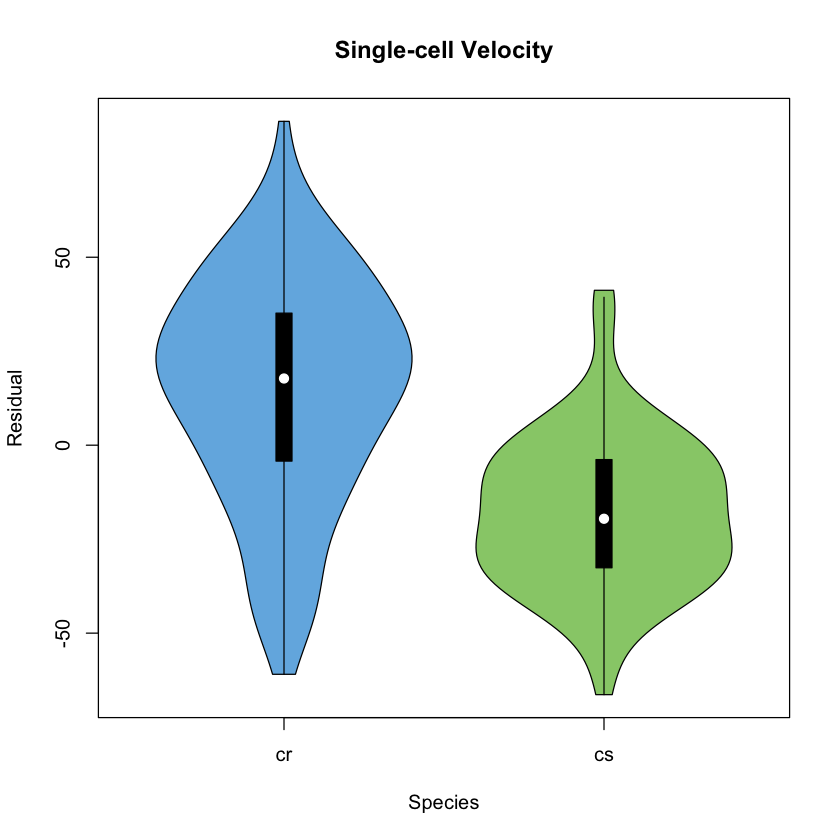

In [12]:
#####################################
#####Loading and organizing data#####
#####################################

#velocity and compare number cells 

# Load data
dat <- read.csv('organized_velocity_data_single.csv', header = TRUE, sep =',')

# Clean up column names (remove periods since some have and some don't)
colnames(dat) <- gsub('\\.', '', colnames(dat))

# Convert data to long format
dat_long <- dat %>%
  pivot_longer(cols = -c(1:2),  # Assuming first two columns do not contain measurement data
               names_to = c("species", "experiment"),
               names_sep = "_",
               values_to = "measure") %>%
  filter(!is.na(measure))  # Remove rows with NA measure values

# Ensure experiment and species are factors with correct levels
dat_long$experiment <- factor(dat_long$experiment, levels = paste0("exp", 1:4))
dat_long$species <- factor(dat_long$species, levels = c("cr", "cs"))

###########################
##### Statistical tests#####
###########################
# Regression 1: species and experiment as predictors
mod1 <- lm(measure ~ experiment + species, data = dat_long)
summary(mod1)

# Regression 2: experiment as predictor
mod2 <- lm(measure ~ experiment, data = dat_long)
summary(mod2)

# Extract residuals
dat_long$residuals <- residuals(mod2)

# Split residuals by species for visualization
residuals_split <- split(dat_long$residuals, dat_long$species)

# Kruskal-Wallis test to compare residuals by species
kruskal.test(residuals_split)

# Set up the colors
colors_species <- c(cr = "#73B5E3", cs = "#97CD78")

# Ensure the colors align with the order of the species
colors_ordered <- colors_species[names(residuals_split)]

# Visualize species differences with a violin plot
vioplot::vioplot(residuals_split,
                 ylab = 'Residual',
                 xlab = 'Species',
                 main = 'Single-cell Velocity',
                 col = colors_ordered)

### multiple-cell velocity


Call:
lm(formula = measure ~ experiment + species, data = dat_long)

Residuals:
   Min     1Q Median     3Q    Max 
-76.43 -17.79   2.01  18.19  54.95 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      47.012      8.936   5.261 4.54e-06 ***
experimentexp2   33.600     14.530   2.313  0.02572 *  
experimentexp3   -1.554     10.559  -0.147  0.88372    
experimentexp4   30.024     13.283   2.260  0.02904 *  
speciescs       -26.564      9.467  -2.806  0.00757 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.42 on 42 degrees of freedom
Multiple R-squared:  0.3253,	Adjusted R-squared:  0.2611 
F-statistic: 5.063 on 4 and 42 DF,  p-value: 0.002017



Call:
lm(formula = measure ~ experiment, data = dat_long)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.856 -18.105   0.949  23.363  61.592 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      36.795      8.789   4.187 0.000137 ***
experimentexp2   34.963     15.639   2.236 0.030625 *  
experimentexp3    2.022     11.289   0.179 0.858681    
experimentexp4   33.600     14.239   2.360 0.022900 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.69 on 43 degrees of freedom
Multiple R-squared:  0.1988,	Adjusted R-squared:  0.1429 
F-statistic: 3.557 on 3 and 43 DF,  p-value: 0.02188



	Kruskal-Wallis rank sum test

data:  residuals_split
Kruskal-Wallis chi-squared = 9.145, df = 1, p-value = 0.002494


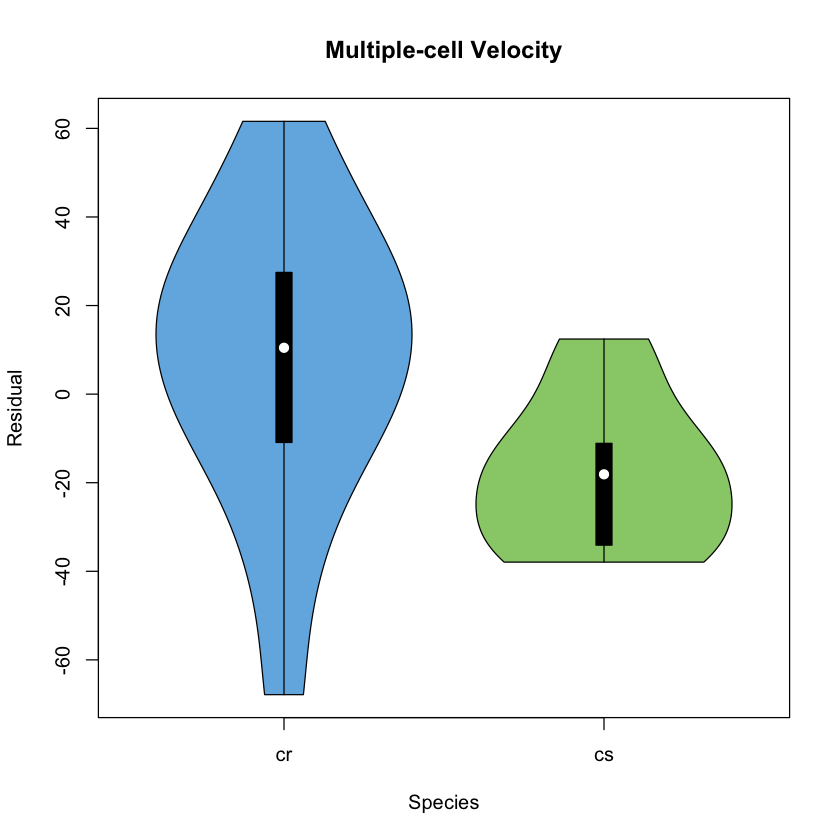

In [14]:
# Load data
dat <- read.csv('organized_velocity_data_multiple.csv', header = TRUE, sep =',')

# Clean up column names (remove periods since some have and some don't)
colnames(dat) <- gsub('\\.', '', colnames(dat))

# Convert data to long format
dat_long <- dat %>%
  pivot_longer(cols = -c(1:2),  # Assuming first two columns do not contain measurement data
               names_to = c("species", "experiment"),
               names_sep = "_",
               values_to = "measure") %>%
  filter(!is.na(measure))  # Remove rows with NA measure values

# Ensure experiment and species are factors with correct levels
dat_long$experiment <- factor(dat_long$experiment, levels = paste0("exp", 1:4))
dat_long$species <- factor(dat_long$species, levels = c("cr", "cs"))

###########################
##### Statistical tests#####
###########################
# Regression 1: species and experiment as predictors
mod1 <- lm(measure ~ experiment + species, data = dat_long)
summary(mod1)

# Regression 2: experiment as predictor
mod2 <- lm(measure ~ experiment, data = dat_long)
summary(mod2)

# Extract residuals
dat_long$residuals <- residuals(mod2)

# Split residuals by species for visualization
residuals_split <- split(dat_long$residuals, dat_long$species)

# Kruskal-Wallis test to compare residuals by species
kruskal.test(residuals_split)

# Set up the colors
colors_species <- c(cr = "#73B5E3", cs = "#97CD78")

# Ensure the colors align with the order of the species
colors_ordered <- colors_species[names(residuals_split)]

# Visualize species differences with a violin plot
vioplot::vioplot(residuals_split,
                 ylab = 'Residual',
                 xlab = 'Species',
                 main = 'Multiple-cell Velocity',
                 col = colors_ordered)


### Regressions on angular velocity 

### single-cell 


Call:
lm(formula = measure ~ experiment + species, data = dat_long)

Residuals:
    Min      1Q  Median      3Q     Max 
-604.10 -287.18  -93.97  112.05 2043.69 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      771.32      66.03  11.681  < 2e-16 ***
experimentexp2  -218.14      80.35  -2.715 0.007098 ** 
experimentexp3   -79.53      89.16  -0.892 0.373283    
experimentexp4  -312.17      81.02  -3.853 0.000149 ***
speciescs         45.30      56.98   0.795 0.427343    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 446.3 on 245 degrees of freedom
Multiple R-squared:  0.07032,	Adjusted R-squared:  0.05514 
F-statistic: 4.633 on 4 and 245 DF,  p-value: 0.001271



Call:
lm(formula = measure ~ experiment, data = dat_long)

Residuals:
    Min      1Q  Median      3Q     Max 
-577.09 -277.68  -94.12  122.43 2019.65 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      789.61      61.85  12.767  < 2e-16 ***
experimentexp2  -216.77      80.27  -2.701 0.007403 ** 
experimentexp3   -73.78      88.80  -0.831 0.406828    
experimentexp4  -310.61      80.93  -3.838 0.000158 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 446 on 246 degrees of freedom
Multiple R-squared:  0.06792,	Adjusted R-squared:  0.05655 
F-statistic: 5.975 on 3 and 246 DF,  p-value: 0.0006025



	Kruskal-Wallis rank sum test

data:  residuals_split
Kruskal-Wallis chi-squared = 0.90868, df = 1, p-value = 0.3405


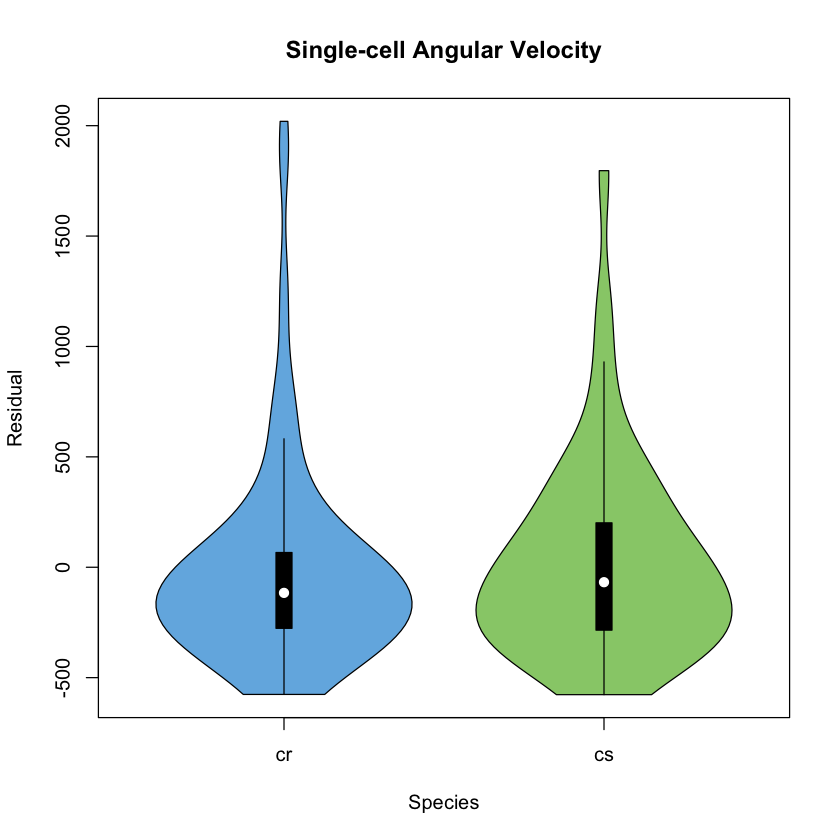

In [15]:
# Load data
dat <- read.csv('organized_angular_velocity_data_single.csv', header = TRUE, sep =',')

# Clean up column names (remove periods since some have and some don't)
colnames(dat) <- gsub('\\.', '', colnames(dat))

# Convert data to long format
dat_long <- dat %>%
  pivot_longer(cols = -c(1:2),  # Assuming first two columns do not contain measurement data
               names_to = c("species", "experiment"),
               names_sep = "_",
               values_to = "measure") %>%
  filter(!is.na(measure))  # Remove rows with NA measure values

# Ensure experiment and species are factors with correct levels
dat_long$experiment <- factor(dat_long$experiment, levels = paste0("exp", 1:4))
dat_long$species <- factor(dat_long$species, levels = c("cr", "cs"))

###########################
##### Statistical tests#####
###########################
# Regression 1: species and experiment as predictors
mod1 <- lm(measure ~ experiment + species, data = dat_long)
summary(mod1)

# Regression 2: experiment as predictor
mod2 <- lm(measure ~ experiment, data = dat_long)
summary(mod2)

# Extract residuals
dat_long$residuals <- residuals(mod2)

# Split residuals by species for visualization
residuals_split <- split(dat_long$residuals, dat_long$species)

# Kruskal-Wallis test to compare residuals by species
kruskal.test(residuals_split)

# Set up the colors
colors_species <- c(cr = "#73B5E3", cs = "#97CD78")

# Ensure the colors align with the order of the species
colors_ordered <- colors_species[names(residuals_split)]

# Visualize species differences with a violin plot
vioplot::vioplot(residuals_split,
                 ylab = 'Residual',
                 xlab = 'Species',
                 main = 'Single-cell Angular Velocity',
                 col = colors_ordered)

### multiple-cell angular velocity


Call:
lm(formula = measure ~ experiment + species, data = dat_long)

Residuals:
   Min     1Q Median     3Q    Max 
-888.3 -636.2 -281.4  211.2 2391.5 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     1136.34     263.15   4.318  9.4e-05 ***
experimentexp2  -474.58     427.88  -1.109    0.274    
experimentexp3   -36.14     310.96  -0.116    0.908    
experimentexp4  -285.03     391.16  -0.729    0.470    
speciescs        -30.75     278.78  -0.110    0.913    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 866.5 on 42 degrees of freedom
Multiple R-squared:  0.03977,	Adjusted R-squared:  -0.05169 
F-statistic: 0.4348 on 4 and 42 DF,  p-value: 0.7827



Call:
lm(formula = measure ~ experiment, data = dat_long)

Residuals:
   Min     1Q Median     3Q    Max 
-880.6 -638.5 -269.6  206.8 2399.2 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1124.5      237.5   4.734 2.41e-05 ***
experimentexp2   -473.0      422.7  -1.119    0.269    
experimentexp3    -32.0      305.1  -0.105    0.917    
experimentexp4   -280.9      384.9  -0.730    0.469    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 856.5 on 43 degrees of freedom
Multiple R-squared:  0.03949,	Adjusted R-squared:  -0.02753 
F-statistic: 0.5893 on 3 and 43 DF,  p-value: 0.6254



	Kruskal-Wallis rank sum test

data:  residuals_split
Kruskal-Wallis chi-squared = 0.026515, df = 1, p-value = 0.8706


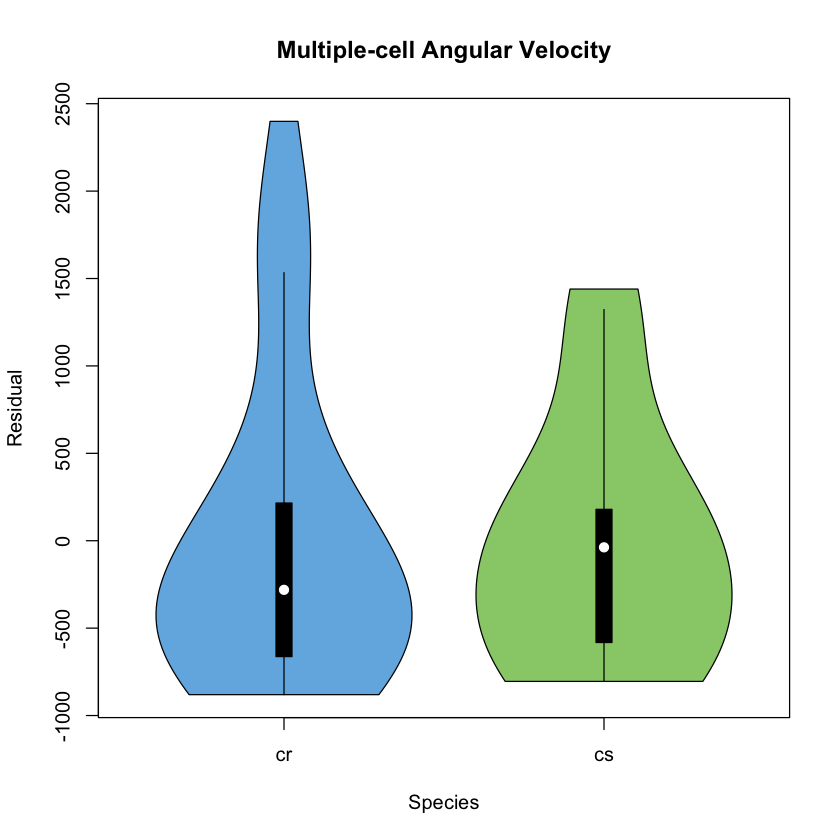

In [16]:
# Load data
dat <- read.csv('organized_angular_velocity_data_multiple.csv', header = TRUE, sep =',')

# Clean up column names (remove periods since some have and some don't)
colnames(dat) <- gsub('\\.', '', colnames(dat))

# Convert data to long format
dat_long <- dat %>%
  pivot_longer(cols = -c(1:2),  # Assuming first two columns do not contain measurement data
               names_to = c("species", "experiment"),
               names_sep = "_",
               values_to = "measure") %>%
  filter(!is.na(measure))  # Remove rows with NA measure values

# Ensure experiment and species are factors with correct levels
dat_long$experiment <- factor(dat_long$experiment, levels = paste0("exp", 1:4))
dat_long$species <- factor(dat_long$species, levels = c("cr", "cs"))

###########################
##### Statistical tests#####
###########################
# Regression 1: species and experiment as predictors
mod1 <- lm(measure ~ experiment + species, data = dat_long)
summary(mod1)

# Regression 2: experiment as predictor
mod2 <- lm(measure ~ experiment, data = dat_long)
summary(mod2)

# Extract residuals
dat_long$residuals <- residuals(mod2)

# Split residuals by species for visualization
residuals_split <- split(dat_long$residuals, dat_long$species)

# Kruskal-Wallis test to compare residuals by species
kruskal.test(residuals_split)

# Set up the colors
colors_species <- c(cr = "#73B5E3", cs = "#97CD78")

# Ensure the colors align with the order of the species
colors_ordered <- colors_species[names(residuals_split)]

# Visualize species differences with a violin plot
vioplot::vioplot(residuals_split,
                 ylab = 'Residual',
                 xlab = 'Species',
                 main = 'Multiple-cell Angular Velocity',
                 col = colors_ordered)

In [17]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Monterey 12.5.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/Los_Angeles
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tidyr_1.3.0   vioplot_0.4.0 zoo_1.8-12    sm_2.2-5.7.1  dplyr_1.1.2  

loaded via a namespace (and not attached):
 [1] crayon_1.5.2     vctrs_0.6.3      cli_3.6.1        rlang_1.1.1     
 [5] purrr_1.0.2      generics_0.1.3   jsonlite_1.8.7   glue_1.6.2      
 [9] htmltools_0.5.6  IRdisplay_1.1    IRkernel_1.3.2   fansi_1.0.4     
[13] grid_4.3.1       evaluate_0.21    tibble_3.2.1     fastmap_1.1.